# K Nearest Neighbor (KNN)

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load dữ liệu
dataset = pd.read_csv('diabetes.csv')

## 1) Khám phá dữ liệu

In [4]:
# get how many instances (rows) and how many attributes (columns)
dataset.shape

(768, 9)

In [5]:
#show thông tin thống kê cơ bản: max, min, mean của các columns trong dataset
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#để hiện thông tin thống kê tất cả column (gồm categorical columns)
dataset.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#Show vài dòng đầu tiên của dữ liệu
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
#Show vài dòng cuối của dữ liệu
dataset.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
# T number of instances (rows) that belong to each class. 
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

### Scale dataset

Vì đơn vị của mỡi feature khác nhau

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset.drop('Outcome',axis=1))
scaled_features = scaler.transform(dataset.drop('Outcome',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=dataset.columns[:-1])
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


###  Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
scaled_dataset = pd.concat([df_feat,dataset['Outcome']],axis=1)

#### Pairplot

<Figure size 640x480 with 0 Axes>

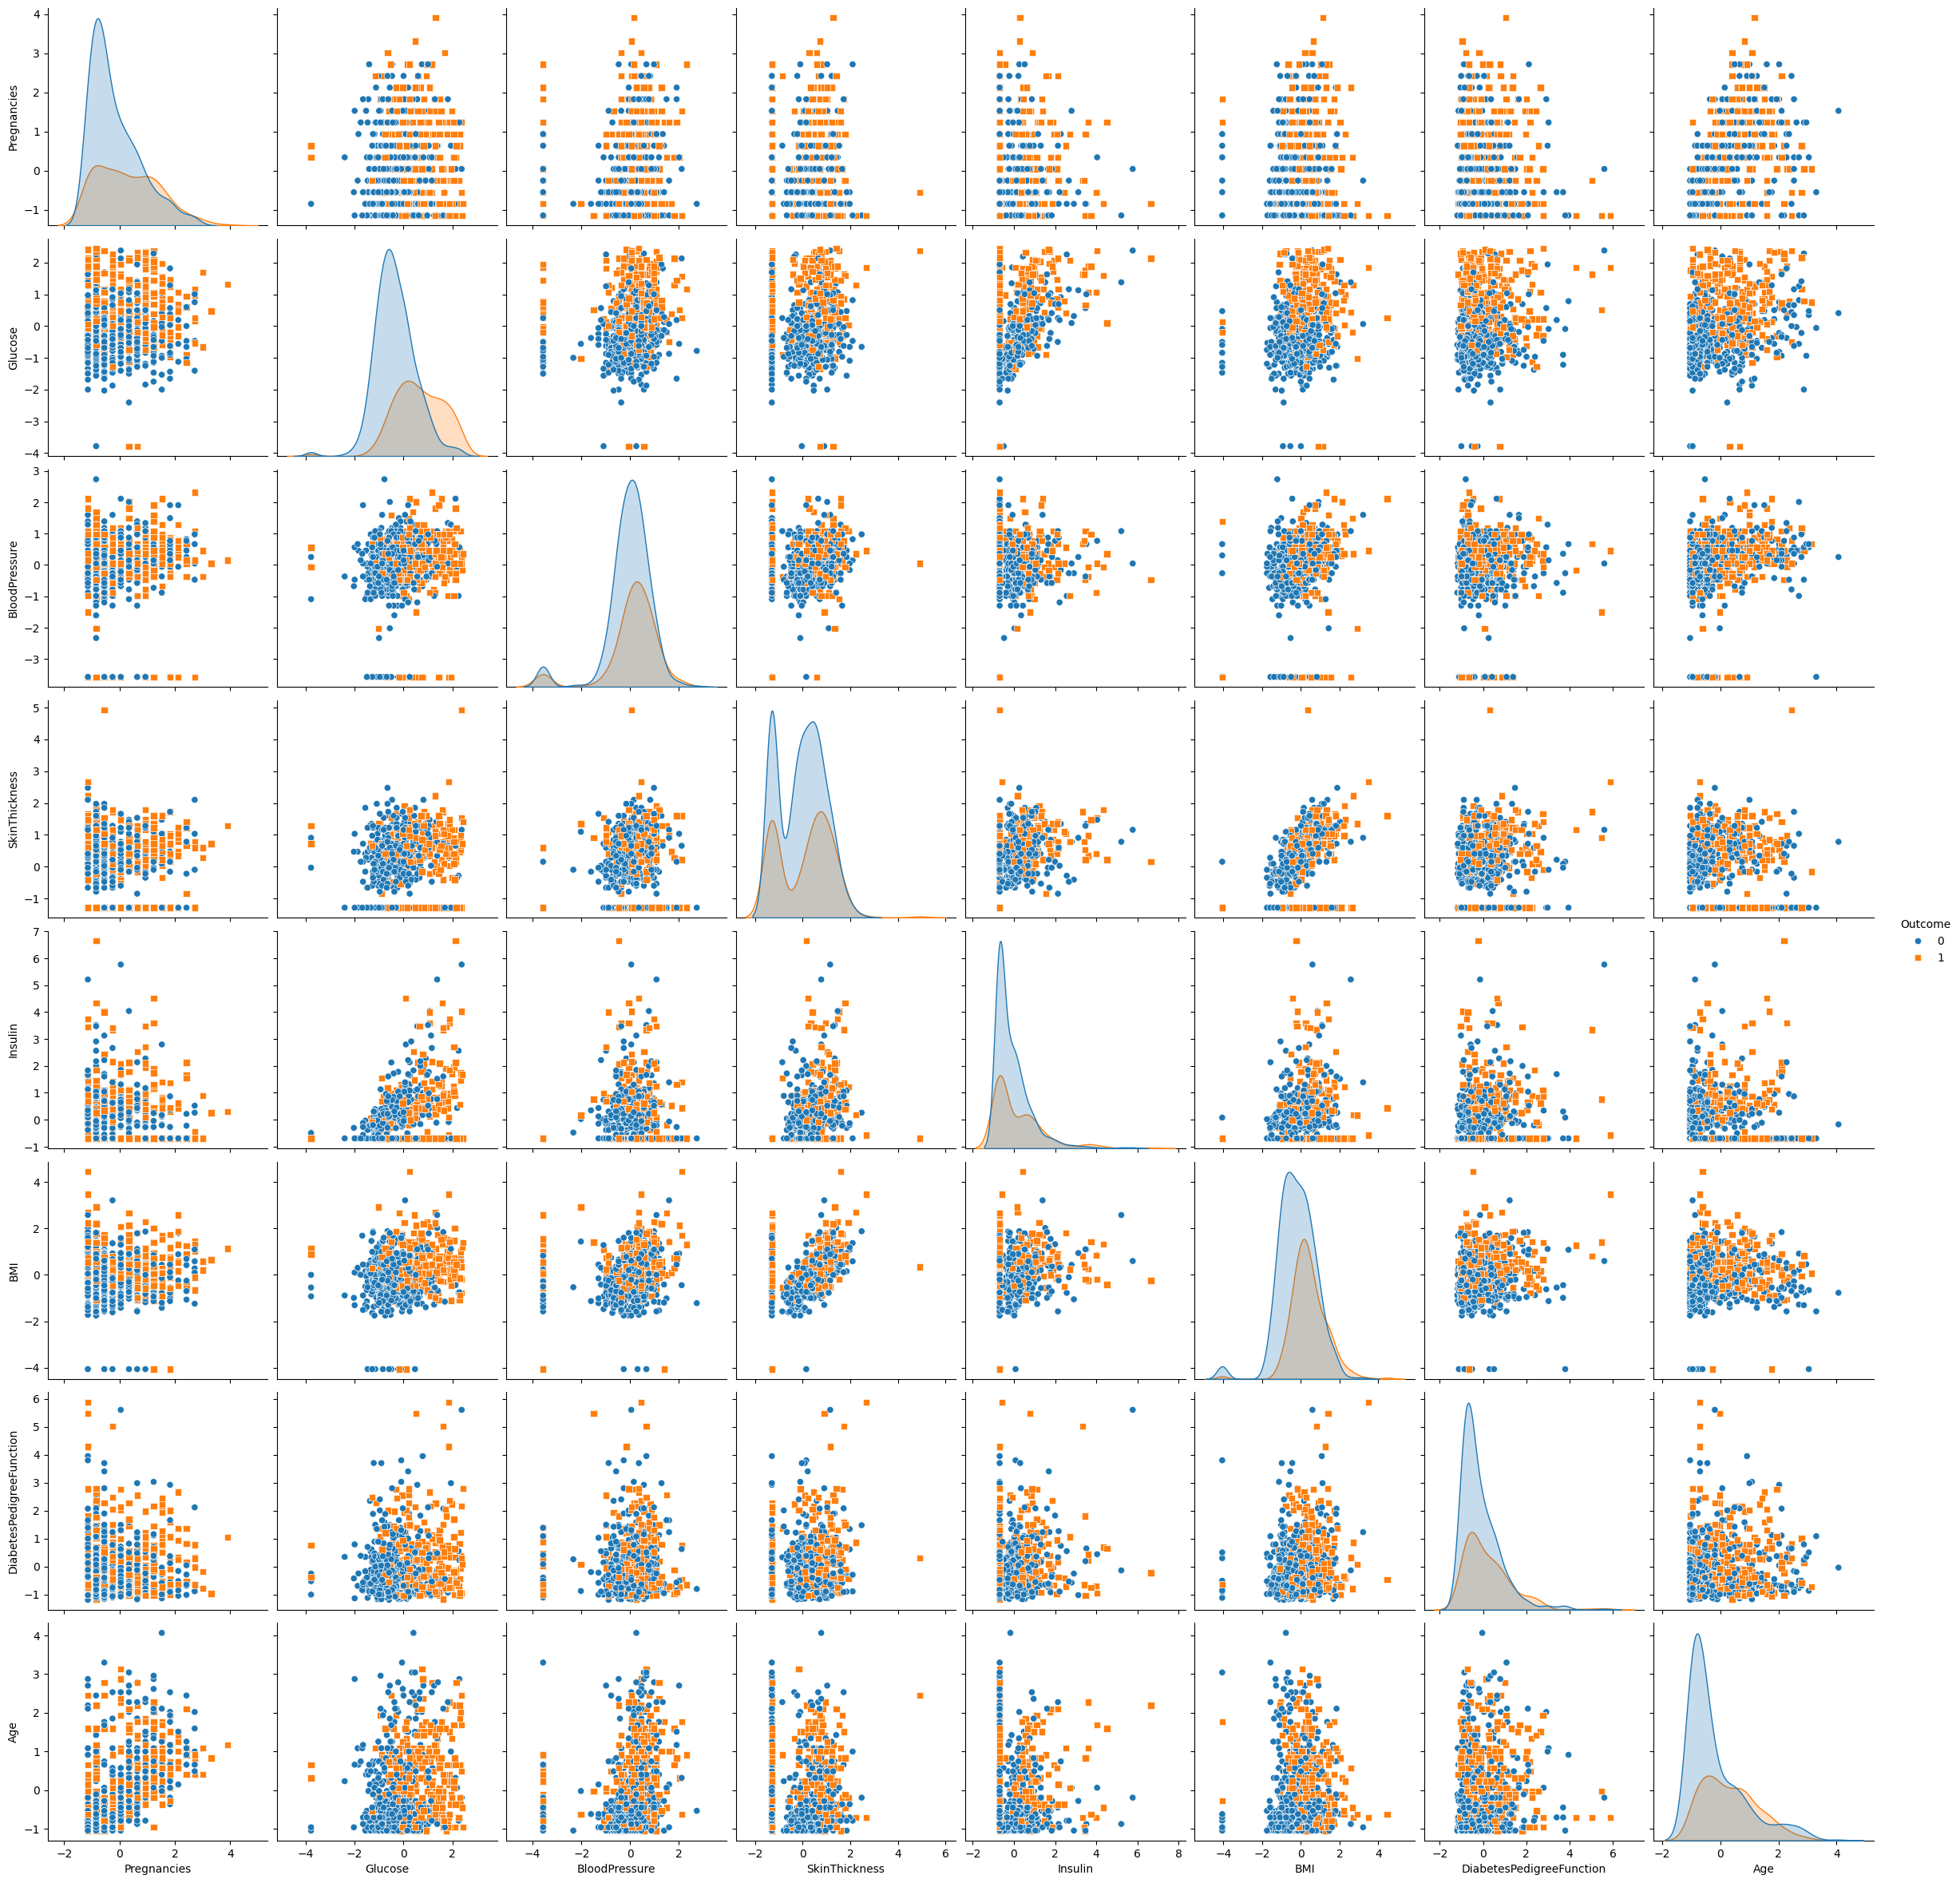

In [13]:
plt.figure()
sns.pairplot(scaled_dataset, hue = "Outcome", height=3, markers=["o", "s"])
plt.show()

####  Boxplots

In [14]:
# plt.figure()
# dataset.boxplot(by="Outcome", figsize=(30, 20))
# plt.show()

## 2) Data preprocessing

#### Xác định  ``features`` và ``labels``

In [15]:
feature_columns = list(scaled_dataset)[0:-1] # Excluding Outcome column
X = scaled_dataset[feature_columns].values
y = scaled_dataset['Outcome'].values


#### Encoding (Lable Encoding)

Outcome là 0 và 1, khỏi encode

0 là ko bịnh
1 là bị bịnh

####  Spliting dataset into training set and test set

- training set: dùng để xây dựng classifier
- test set: sẽ được sử dụng để evaluate liệu  classifier  tốt hay không

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [17]:
X_train.shape #số rows dùng để train(80%)

(614, 8)

In [18]:
y_train.shape

(614,)

In [19]:
X_test.shape #số rows dùng để test (20%)

(154, 8)

In [20]:
y_test.shape

(154,)

## 3) Using KNN for classification

####  Xây dựng model

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score



#### Thay đổi ``k`` để tìm ``k`` phù hợp

In [22]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

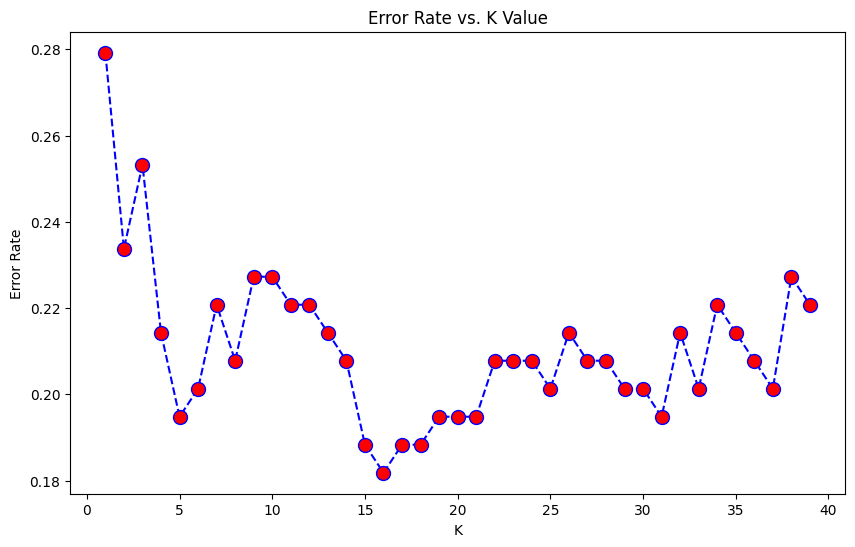

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Từ biểu đồ trên, ta chọn ``k = 5`` để xây dựng model

In [24]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[88 19]
 [24 23]]


              precision    recall  f1-score   support

           0       0.79      0.82      0.80       107
           1       0.55      0.49      0.52        47

    accuracy                           0.72       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.71      0.72      0.72       154



In [31]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[94 13]
 [17 30]]


              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154

